<a href="https://colab.research.google.com/github/Satyajit24behera/Text-Analysis-Toolkit/blob/main/Spacy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


2023-09-03 20:22:44.880261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")


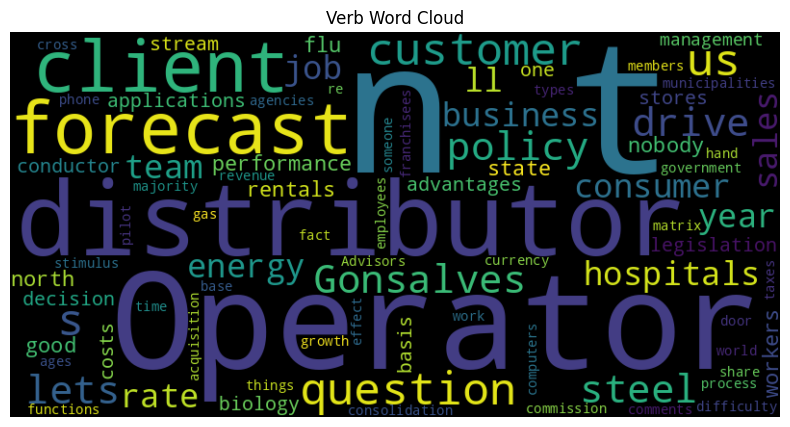

<Figure size 640x480 with 0 Axes>

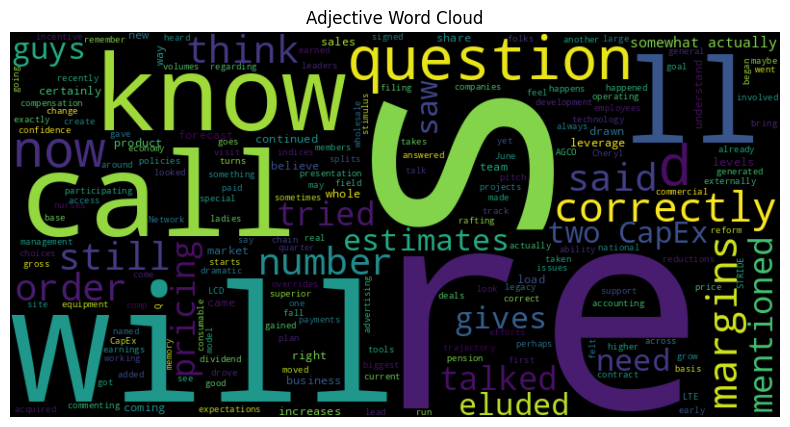

<Figure size 640x480 with 0 Axes>

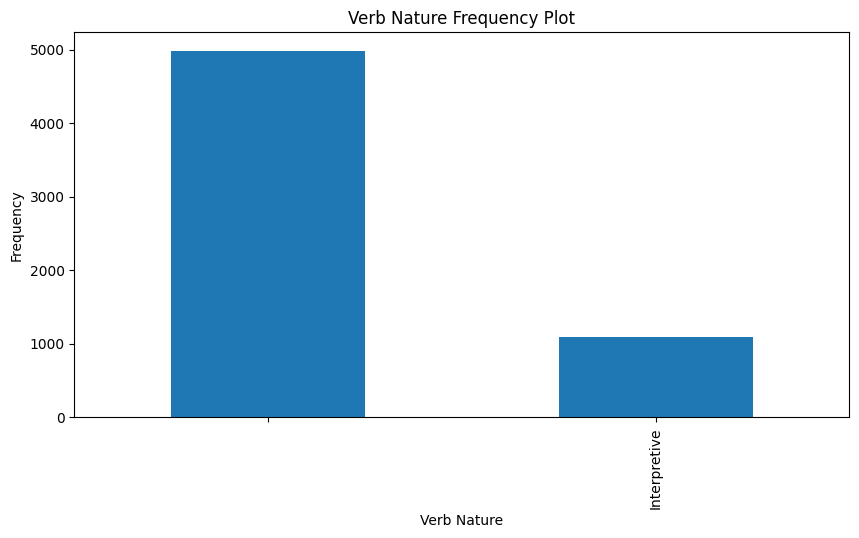

<Figure size 640x480 with 0 Axes>

In [ ]:
# Import necessary libraries
import pandas as pd
import spacy
from spacy.matcher import Matcher
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path to your dataset
df = pd.read_csv('/content/log_1_20k_QnA (1).csv', encoding='latin1')

# Select a random subset of about 100 rows
random_subset = df.sample(n=100, random_state=42)  # Change random_state as needed

# Initialize lists to store data
sentences = []
verbs = []
adjectives = []
verb_nature = []

# Define a spaCy Matcher pattern to extract Subject - Verb - Object - Adjective
matcher = Matcher(nlp.vocab)
pattern = [{"POS": {"in": ["NOUN", "PRON"]}}, {"POS": "VERB"}, {"POS": {"in": ["NOUN", "PRON"]}}, {"POS": "ADJ", "OP": "?"}]
matcher.add("SubjectVerbObjectAdjective", [pattern])

# Process each row in the random subset
for index, row in random_subset.iterrows():
    text = str(row['text_column'])  # Convert to string and replace 'text_column' with the actual column name

    doc = nlp(text)

    for sent in doc.sents:
        sentences.append(sent.text)

        # Use the Matcher to find Subject - Verb - Object - Adjective patterns
        matches = matcher(sent)
        if matches:
            match_id, start, end = matches[0]  # Take the first match found
            # Extract tokens based on their positions
            subject = sent[start - 1].text if start > 0 else ''
            verb = sent[start].text
            obj = sent[start + 1].text if start + 1 < len(sent) else ''
            adj = sent[end].text if end < len(sent) else ''

            verbs.append(verb)
            adjectives.append(adj)

            # Classify the verb based on your criteria
            if verb.endswith('ing'):
                verb_nature.append('Descriptive')
            elif verb.endswith('ed'):
                verb_nature.append('State')
            else:
                verb_nature.append('Interpretive')
        else:
            # Append placeholder values when no match is found
            verbs.append('')
            adjectives.append('')
            verb_nature.append('')

# Create a DataFrame to store the results
data = {'Sentence': sentences, 'Verb': verbs, 'Adjective': adjectives, 'Verb Nature': verb_nature}
result_df = pd.DataFrame(data)



# Word Cloud for Verbs
verb_wordcloud = WordCloud(width=800, height=400).generate(' '.join(verbs))
plt.figure(figsize=(10, 5))
plt.imshow(verb_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Verb Word Cloud')
plt.show()
plt.savefig('verb_wordcloud.png')

# Word Cloud for Adjectives
adj_wordcloud = WordCloud(width=800, height=400).generate(' '.join(adjectives))
plt.figure(figsize=(10, 5))
plt.imshow(adj_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Adjective Word Cloud')
plt.show()
plt.savefig('adj_wordcloud.png')

# Frequency plot for Verb-Nature
plt.figure(figsize=(10, 5))
result_df['Verb Nature'].value_counts().plot(kind='bar')
plt.title('Verb Nature Frequency Plot')
plt.xlabel('Verb Nature')
plt.ylabel('Frequency')
plt.show()
plt.savefig('verb_nature_frequency_plot.png')


In [ ]:
# Download the generated plots
from google.colab import files

# List of file names to download
file_names = ['verb_wordcloud.png', 'adj_wordcloud.png', 'verb_nature_frequency_plot.png']

# Download each file
for file_name in file_names:
    files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>